In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#model evaluation in the wrong way
# 1. import the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y.shape

(150,)

In [3]:
#import KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # instaniate the model
model.fit(X, y) #fit to the model
y_pred = model.predict(X) #preict the model

In [4]:
#test the accuracy score for the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly
 labeled by our model! But is this truly measuring the expected accuracy? Have we
 really come upon a model that we expect to be correct 100% of the time?
 As you may have gathered, the answer is no. In fact, this approach contains a funda
mental flaw: it trains and evaluates the model on the same data. Furthermore, this
 nearest neighbor model is an instance-based estimator that simply stores the training
 data, and predicts labels by comparing new data to these stored points: except in con
trived cases, it will get 100% accuracy every time!

In [5]:
#modelvalidation the right-way: using Holdout sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 4)

(75, 4)

(75,)

(75,)

In [6]:
#fit model to the data
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#test the accuracy score of the model
accuracy_score(y_pred, y_test)

0.9066666666666666

We see here a more reasonable result: the one-nearest-neighbor classifier is about
 94% accurate on this holdout set. The holdout set is similar to unknown data, because
 the model has not “seen” it before

In [7]:
#model validation to cross-validation
# cross-validation is to do a sequence of fits where each subset of data is used for validation tests and training sets
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

What comes out are two accuracy scores, which we could combine (by, say, taking the
 mean) to get a better measure of the global model performance. This particular form
 of cross-validation is a two-fold cross-validation—that is, one in which we have split
 the data into two sets and used each in turn as a validation set.

In [8]:
#we can have a 5-fold cross validation, but spliting the data set into 5 cross validation is tedious
# so we will use the cross_val_score() to achive this

from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(model, X, y, cv=5)

np.mean(acc_score)

np.float64(0.96)

In [9]:
#going to the extreme case where we can use the size of the datset to do trial on each dataset. this is called the
# leave-one-out cross validation
from sklearn.model_selection import LeaveOneOut
score = cross_val_score(model, X, y, cv=LeaveOneOut())
score.mean()

np.float64(0.96)

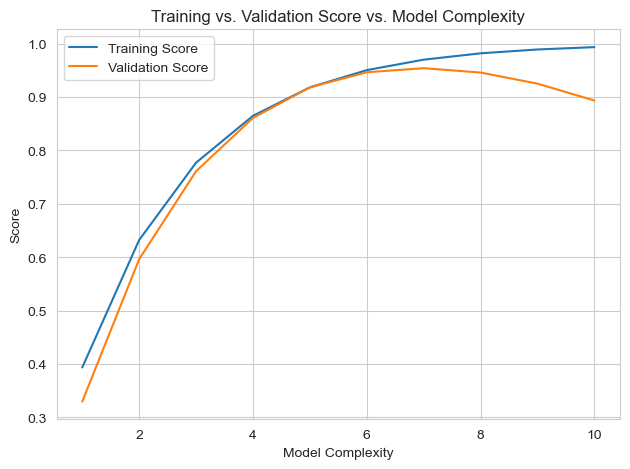

In [10]:

# Generate example data
complexity = np.linspace(1, 10, 10)
training_score = 1 - np.exp(-0.5 * complexity)
validation_score = training_score - 0.1 * (complexity - 5)**2 / 25

# Plot
plt.figure()
plt.plot(complexity, training_score, label='Training Score')
plt.plot(complexity, validation_score, label='Validation Score')
plt.xlabel('Model Complexity')
plt.ylabel('Score')
plt.title('Training vs. Validation Score vs. Model Complexity')
plt.legend()
plt.tight_layout()
plt.show()


Above is a chart of Training vs. Validation Score against Model Complexity. Notice how:
- At low complexity, both scores are poor.
- They both improve until a certain complexity.
- Beyond that point, training keeps improving, but validation declines.

Practical Tips
- Always monitor both scores—not just training.
- If you see a large gap (high training, low validation), add regularization or collect more data.
- If both scores are low, try increasing complexity (more features, deeper model).

In [11]:
#using cross-validation to compute the validation curve for a class of models:Polynomial regression model with a tunable
# paramter of the degree of polynomial

"""
we can implement this with a linear regression classifier combined with the polynomial pre
processor. We will use a pipeline to string these operations together
"""

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree),
LinearRegression(**kwargs))

In [12]:
# create some data that we will fit our model X = feature matrix [n_samples, n_features], Y = target arrray [n_samples]
def make_data(N, err=1.0, rseed=1):
     # randomly sample the data
     rng = np.random.RandomState(rseed)
     X = rng.rand(N, 1) ** 2
     y = 10 - 1. / (X.ravel() + 0.1)
     if err > 0:
         y += err * rng.randn(N)
     return X, y
X, y = make_data(40) 
X.shape, y.shape

((40, 1), (40,))

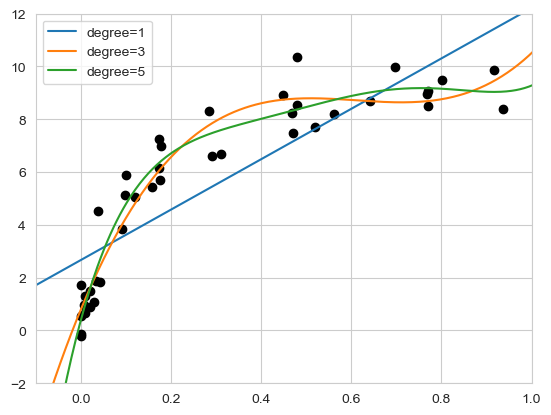

In [13]:
# let visualize our data with polynomial fits for several degree
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');
plt.show()

 The knob controlling model complexity in this case is the degree of the polynomial,
 which can be any nonnegative integer. A useful question to answer is this: what
 degree of polynomial provides a suitable trade-off between bias (underfitting) and
 variance (overfitting)?

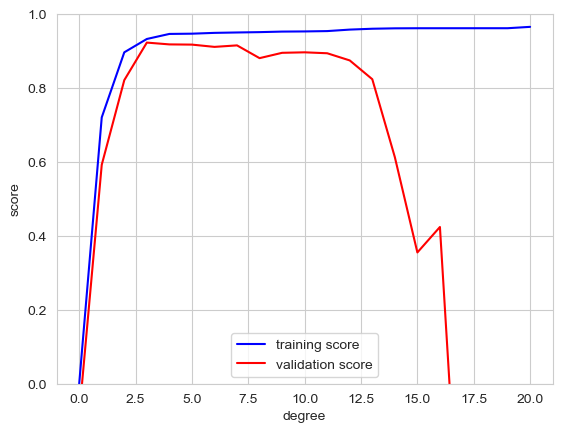

In [14]:
# we can visualize the validation curve for this particular data and model using the validation_curve() which computes 
# automatically the training score and validation score
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
training_score, validation_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7
)

plt.plot(degree, np.median(training_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(validation_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.show()

 From the validation curve, we can determine that the optimal trade-off between bias
 and variance is found for a third-order polynomial. We can compute and display this
 fit over the original data as follows

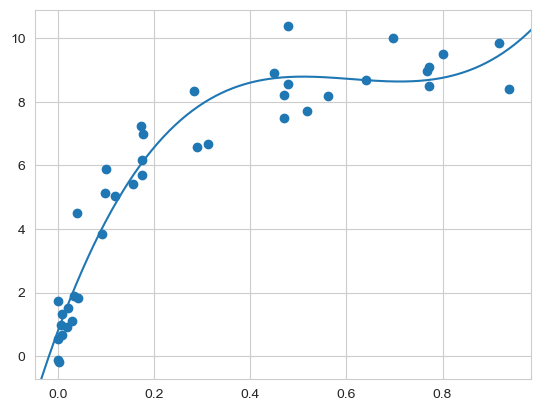

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

 Notice that finding this optimal model did not actually require us to compute the
 training score, but examining the relationship between the training score and valida
tion score can give us useful insight into the performance of the model

In [16]:
# Learning curves
#one important aspect of model complexity is the ability of optimal model to learn from a large datastes
# lets generate a large dataset and compare with the previous validation_curve
X1 , y1 = make_data(200)
X1.shape, y1.shape

((200, 1), (200,))

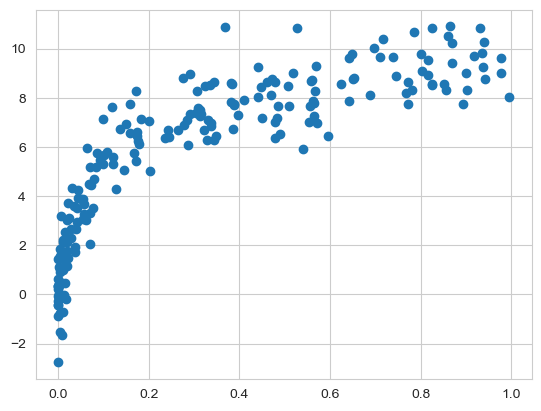

In [17]:
plt.scatter(X1.ravel(), y1)
plt.show()

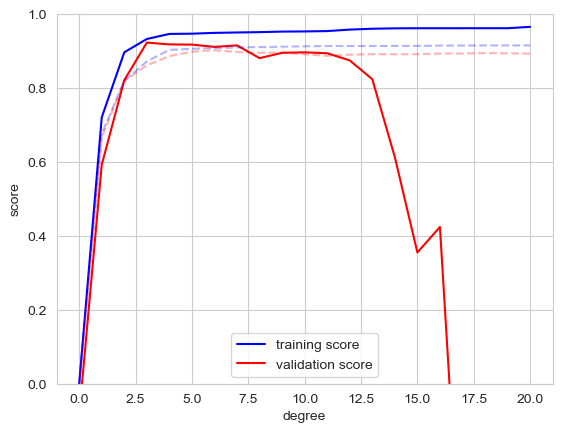

In [18]:
# degree = np.arange(0, 21)
training_score1, validation_score1 = validation_curve(
    PolynomialRegression(), X1, y1,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7
)

plt.plot(degree, np.median(training_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(validation_score, 1), color='red', label='validation score')
plt.plot(degree, np.median(training_score1, 1), color='blue',  alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(validation_score1, 1), color='red',  alpha=0.3, linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.show()

It is clear from the validation curve that the larger
 dataset can support a much more complicated model: the peak here is probably
 around a degree of 6, but even a degree-20 model isn’t seriously overfitting the data—
 the validation and training scores remain very close.

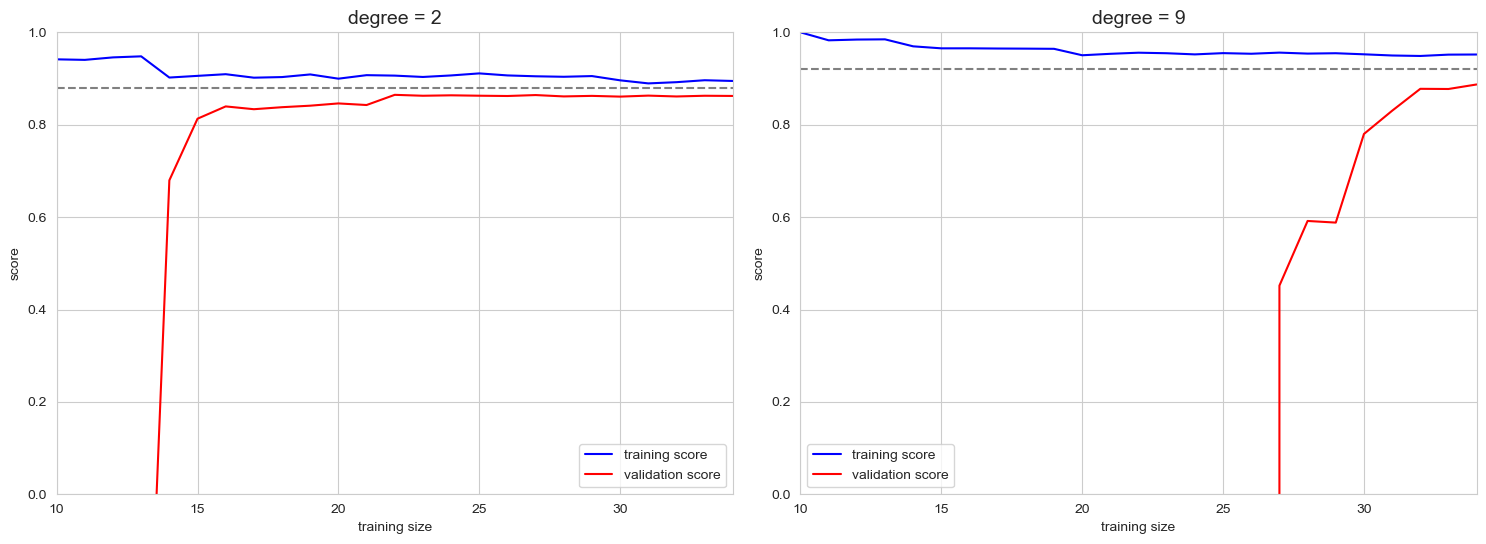

In [19]:
#Scikit-Learn offers a convenient utility for computing such learning curves from your models
#here we will compute a learning curve for our original dataset with a secondorder polynomial model and a ninth-order polynomial
from sklearn.model_selection import learning_curve

#create two subplots on the same column, so as to compare the degree of 2 and 9
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
     N, train_lc, val_lc = learning_curve( PolynomialRegression(degree), X, y,
                                           cv=7, train_sizes=np.linspace(0.3, 1, 25))
    
     ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
     ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')

     ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
     ax[i].set_ylim(0, 1)

     ax[i].set_xlim(N[0], N[-1])
     ax[i].set_xlabel('training size')
     ax[i].set_ylabel('score')
     ax[i].set_title('degree = {0}'.format(degree), size=14)
     ax[i].legend(loc='best')


This is a valuable diagnostic, because it gives us a visual depiction of how our model
 responds to increasing amounts of training data. In particular, when the learning
 curve has already converged (i.e., when the training and validation curves are already
 close to each other) adding more training data will not significantly improve the fit!
 This situation is seen in the left panel, with the learning curve for the degree-2 model.

  The only way to increase the converged score is to use a different (usually more com
plicated) model. We see this in the right panel: by moving to a much more compli
cated model, we increase the score of convergence (indicated by the dashed line), but
 at the expense of higher model variance (indicated by the difference between the
 training and validation scores). If we were to add even more data points, the learning
 curve for the more complicated model would eventually converge

 Plotting a learning curve for your particular choice of model and dataset can help you
 to make this type of decision about how to move forward in improving your analysis.

 The solid lines show the new results, while the fainter dashed lines show the results
 on the previous smaller dataset. It is clear from the validation curve that the larger
 dataset can support a much more complicated model: the peak here is probably
 around a degree of 6, but even a degree-20 model isn’t seriously overfitting the data—
 the validation and training scores remain very close.

In [20]:
# Learning curve in practice using KNN model. we will be uisng the digit datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

digits = load_digits()

#get the X-feature matrix and the y-target array
X = digits.data
y = digits.target

X.shape, y.shape


((1797, 64), (1797,))

In [21]:
#from model_selection import the learning curve
from sklearn.model_selection import learning_curve
size, training_score, validation_score = learning_curve(KNeighborsClassifier(), 
                                                     X, y, cv=10, 
                                                     scoring='accuracy',
                                                    train_sizes=np.linspace(0.1, 1.0, 50))


#mean and standard deviation of the training_score
mean_training = np.mean(training_score, axis=1)
standard_deviation_training = np.std(training_score, axis=1)

#mean and standard deviation of the trainig score
mean_validation = np.mean(validation_score, axis=1)
standard_deviation_training = np.std(validation_score, axis=1)

mean_training.shape


(50,)

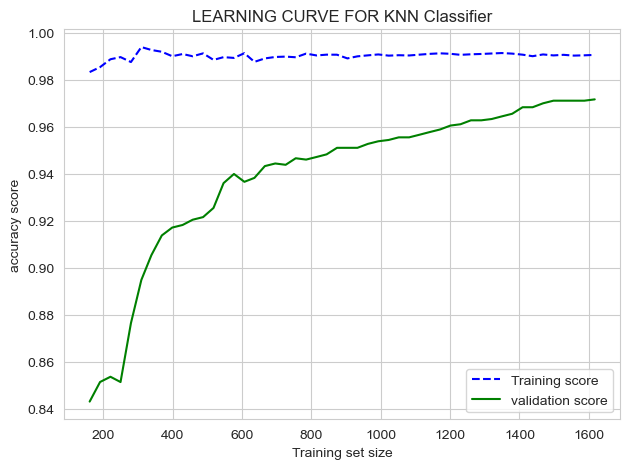

In [22]:

plt.plot(size, mean_training, '--', color="b",  label="Training score")
plt.plot(size, mean_validation, color="g", label="validation score")

plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel('Training set size'); plt.ylabel('accuracy score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converge. The cross-validation accuracy increases as we add more training data. So adding training data is useful in this case. Since the training score is very accurate, this indicates low bias and high variance

In [ ]:
# validation in practice: Grid search
#Hyperparameter tuning with GridSearchcv. getting the best set of parameters using selected for the model
from sklearn.model_selection import GridSearchCV

# Assigning the parameters and its values which need to be tuned
param_grid = {
  'polynomialfeatures__degree': np.arange(21),
  'linearregression__fit_intercept': [True, False]
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

In [ ]:
# now the model is fit we can now ask for the best parameter
grid.best_params_

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y =  iris.target

X.shape, y.shape